In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from scipy import stats
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_columns', None)

In [110]:
df=pd.read_csv("../data/spec_not_norm.csv") # 유저 스펙 없는 데이터
# df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['funnel_100']=df['funnel_01']+df['funnel_10']
df

,유저_번호,고유_일자,첫_로그_일자,마지막_로그_일자,앱_실행,조회_전환_시간,방문일자비율,앱실행비율,세션당_한도조회_시작하기_버튼_클릭,세션당_한도조회_인트로_페이지_조회,세션당_한도조회_결과_확인,세션당_대출관리_서비스_이용,세션당_로그인,세션당_본인인증완료,세션당_KCB_신용정보_조회,전체_이벤트,신청서_갯수,신청_갯수,R,F,M,세션당_여윳돈+DSR_계산기_서비스_이용,UG,GU,GV,UV,VG,VU,funnel_01,funnel_10,funnel_21,funnel_32,funnel_10_hesitate_mean,funnel_21_hesitate_sec_mean,funnel_32_hesitate_sec_mean,funnel_100
0,21,0.197520,0.472527,0.296703,0.196562,NaN,0.092360,0.048674,0.093109,0.066667,NaN,0.066667,0.266667,0.000000,0.088889,0.234374,NaN,NaN,0.333333,0.666667,NaN,0.000000,0.128798,0.250788,0.0,0.000000,0.339529,0.000000,0.293305,0.000000,0.0,0.0,0.5,0.0,0.0,0.293305
1,62,0.143111,0.626374,0.164835,0.063279,NaN,0.047446,0.011330,0.000000,0.000000,NaN,0.083333,0.166667,0.000000,0.111111,0.030127,NaN,NaN,0.666667,0.333333,NaN,0.000000,0.128798,0.141236,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,94,0.143111,0.472527,0.230769,0.158695,NaN,0.066380,0.038050,0.000000,0.000000,NaN,0.083333,0.166667,0.000000,0.083333,0.143142,NaN,NaN,0.333333,0.666667,NaN,0.000000,0.000000,0.141236,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,153,0.143111,0.989011,0.384615,0.063279,NaN,0.025742,0.005341,0.000000,0.000000,NaN,0.166667,0.000000,0.000000,0.111111,0.030127,NaN,NaN,0.333333,0.000000,NaN,0.000000,0.128798,0.250788,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,230,0.143111,0.978022,0.241758,0.063279,NaN,0.026167,0.005458,0.000000,0.000000,NaN,0.166667,0.333333,0.000000,0.000000,0.030127,NaN,NaN,0.333333,0.000000,NaN,0.000000,0.128798,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40783,879576,0.357051,0.956044,0.021978,0.286868,NaN,0.092360,0.038050,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.081456,NaN,NaN,1.000000,0.666667,NaN,0.000000,0.128798,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
40784,879629,0.646821,0.934066,0.153846,0.615097,NaN,0.275336,0.164322,0.000000,0.031250,NaN,0.156250,0.302083,0.020286,0.045139,0.675034,NaN,NaN,0.666667,1.000000,NaN,0.000000,0.379343,0.340298,0.0,0.602888,0.339529,0.415037,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
40785,879644,0.466522,0.967033,0.065934,0.374822,NaN,0.142032,0.058513,0.000000,0.000000,NaN,0.055556,0.138889,0.000000,0.055556,0.338086,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.228701,0.340298,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
40786,879653,0.143111,1.000000,0.164835,0.114981,NaN,0.025326,0.010434,0.000000,0.000000,NaN,0.166667,0.333333,0.000000,0.074074,0.143142,NaN,NaN,0.666667,0.333333,NaN,0.000000,0.228701,0.250788,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [111]:
df.columns
#"['VGU', 'GVU', 'VUG', 'UGV', 'UVG'] 

Index(['유저_번호', '고유_일자', '첫_로그_일자', '마지막_로그_일자', '앱_실행', '조회_전환_시간', '방문일자비율',
       '앱실행비율', '세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회', '세션당_한도조회_결과_확인',
       '세션당_대출관리_서비스_이용', '세션당_로그인', '세션당_본인인증완료', '세션당_KCB_신용정보_조회', '전체_이벤트',
       '신청서_갯수', '신청_갯수', 'R', 'F', 'M', '세션당_여윳돈+DSR_계산기_서비스_이용', 'UG', 'GU',
       'GV', 'UV', 'VG', 'VU', 'funnel_01', 'funnel_10', 'funnel_21',
       'funnel_32', 'funnel_10_hesitate_mean', 'funnel_21_hesitate_sec_mean',
       'funnel_32_hesitate_sec_mean', 'funnel_100'],
      dtype='object')

In [112]:
len(df)

40788

In [113]:
df.isnull().sum()

유저_번호                              0
고유_일자                              0
첫_로그_일자                            0
마지막_로그_일자                          0
앱_실행                               0
조회_전환_시간                       40788
방문일자비율                             0
앱실행비율                              0
세션당_한도조회_시작하기_버튼_클릭                0
세션당_한도조회_인트로_페이지_조회                0
세션당_한도조회_결과_확인                 40788
세션당_대출관리_서비스_이용                    0
세션당_로그인                            0
세션당_본인인증완료                         0
세션당_KCB_신용정보_조회                    0
전체_이벤트                             0
신청서_갯수                         40788
신청_갯수                          40788
R                                  0
F                                  0
M                              40788
세션당_여윳돈+DSR_계산기_서비스_이용             0
UG                                 0
GU                                 0
GV                                 0
UV                                 0
VG                                 0
V

In [96]:
# df = df[df["전체_이벤트"]>= -3.890494e-01]
df = df.drop(['신청서_갯수', '신청_갯수','조회_전환_시간','M','세션당_한도조회_결과_확인'],axis=1)

In [97]:
df.columns

Index(['유저_번호', '고유_일자', '첫_로그_일자', '마지막_로그_일자', '앱_실행', '방문일자비율', '앱실행비율',
       '세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회', '세션당_대출관리_서비스_이용',
       '세션당_로그인', '세션당_본인인증완료', '세션당_KCB_신용정보_조회', '전체_이벤트', 'R', 'F',
       '세션당_여윳돈+DSR_계산기_서비스_이용', 'UG', 'GU', 'GV', 'UV', 'VG', 'VU',
       'funnel_01', 'funnel_10', 'funnel_21', 'funnel_32',
       'funnel_10_hesitate_mean', 'funnel_21_hesitate_sec_mean',
       'funnel_32_hesitate_sec_mean', 'funnel_100'],
      dtype='object')

In [55]:
# # 왜도 3인 설명변수 log1p 변환
# skewd_cols=[]
# for val in df.columns:
#     if abs(df[val].skew()) > 4:
#         # print("log1p 변환이전 : ", abs(df[val].skew()))
#         skewd_cols.append(val)

In [56]:
# for col in skewd_cols:
#     sns.kdeplot(df[col], shade=True)
#     plt.title(col+"의 밀도추정함수: 왜도 "+str(abs(df[col].skew())),fontsize=15)
#     plt.show()

In [57]:
# # 왜도 3인 설명변수 log1p 변환
# for val in df.columns:
#     if abs(df[val].skew()) > 4:
#         df[val] = np.log1p(df[val])

In [58]:
# for col in skewd_cols:
#     sns.kdeplot(df[col], shade=True)
#     plt.title(col+"의 밀도추정함수: 왜도 "+str(abs(df[col].skew())), fontsize=15)
#     plt.show()

In [59]:
# def iqr(data):
#     q1, q3=np.percentile(data, [25, 75])
#     iqr=q3-q1
#     lower_bound=q1-(iqr*1.5)
#     upper_bound=q3+(iqr*1.5)
    
#     return np.where((data>upper_bound)|(data<lower_bound))

In [60]:
# def z_score(data):
#     threshold=3
#     mean=np.mean(data)
#     std=np.std(data)
#     z_scores=[(y-mean)/std for y in data]
    
#     return np.where(np.abs(z_scores)>threshold)

In [98]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [99]:
df=clean_dataset(df)
df_na=df.dropna()
df_na.reset_index(inplace=True, drop=True)
df_na

,유저_번호,고유_일자,첫_로그_일자,마지막_로그_일자,앱_실행,방문일자비율,앱실행비율,세션당_한도조회_시작하기_버튼_클릭,세션당_한도조회_인트로_페이지_조회,세션당_대출관리_서비스_이용,세션당_로그인,세션당_본인인증완료,세션당_KCB_신용정보_조회,전체_이벤트,R,F,세션당_여윳돈+DSR_계산기_서비스_이용,UG,GU,GV,UV,VG,VU,funnel_01,funnel_10,funnel_21,funnel_32,funnel_10_hesitate_mean,funnel_21_hesitate_sec_mean,funnel_32_hesitate_sec_mean,funnel_100
0,21.0,0.197520,0.472527,0.296703,0.196562,0.092360,0.048674,0.093109,0.066667,0.066667,0.266667,0.000000,0.088889,0.234374,0.333333,0.666667,0.000000,0.128798,0.250788,0.0,0.000000,0.339529,0.000000,0.293305,0.000000,0.0,0.0,0.5,0.0,0.0,0.293305
1,62.0,0.143111,0.626374,0.164835,0.063279,0.047446,0.011330,0.000000,0.000000,0.083333,0.166667,0.000000,0.111111,0.030127,0.666667,0.333333,0.000000,0.128798,0.141236,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,94.0,0.143111,0.472527,0.230769,0.158695,0.066380,0.038050,0.000000,0.000000,0.083333,0.166667,0.000000,0.083333,0.143142,0.333333,0.666667,0.000000,0.000000,0.141236,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,153.0,0.143111,0.989011,0.384615,0.063279,0.025742,0.005341,0.000000,0.000000,0.166667,0.000000,0.000000,0.111111,0.030127,0.333333,0.000000,0.000000,0.128798,0.250788,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,230.0,0.143111,0.978022,0.241758,0.063279,0.026167,0.005458,0.000000,0.000000,0.166667,0.333333,0.000000,0.000000,0.030127,0.333333,0.000000,0.000000,0.128798,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40783,879576.0,0.357051,0.956044,0.021978,0.286868,0.092360,0.038050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081456,1.000000,0.666667,0.000000,0.128798,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
40784,879629.0,0.646821,0.934066,0.153846,0.615097,0.275336,0.164322,0.000000,0.031250,0.156250,0.302083,0.020286,0.045139,0.675034,0.666667,1.000000,0.000000,0.379343,0.340298,0.0,0.602888,0.339529,0.415037,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
40785,879644.0,0.466522,0.967033,0.065934,0.374822,0.142032,0.058513,0.000000,0.000000,0.055556,0.138889,0.000000,0.055556,0.338086,1.000000,1.000000,0.000000,0.228701,0.340298,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
40786,879653.0,0.143111,1.000000,0.164835,0.114981,0.025326,0.010434,0.000000,0.000000,0.166667,0.333333,0.000000,0.074074,0.143142,0.666667,0.333333,0.000000,0.228701,0.250788,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [63]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# #표준화
# sc = StandardScaler()
# df_scaled = sc.fit_transform(df_na.drop(['유저_번호'], axis=1))
# df_scaled=pd.DataFrame(df_scaled) #mean~min, mem_period 5개 변수가 표준화됨.
# df_scaled.columns = df_na.drop(['유저_번호'], axis=1).columns
# df_scaled['유저_번호'] = df_na['유저_번호']
# df_scaled

In [100]:
X=df_na.drop(['유저_번호'], axis=1)

Text(0.5, 1.0, 'Iris feature correlation matrix')

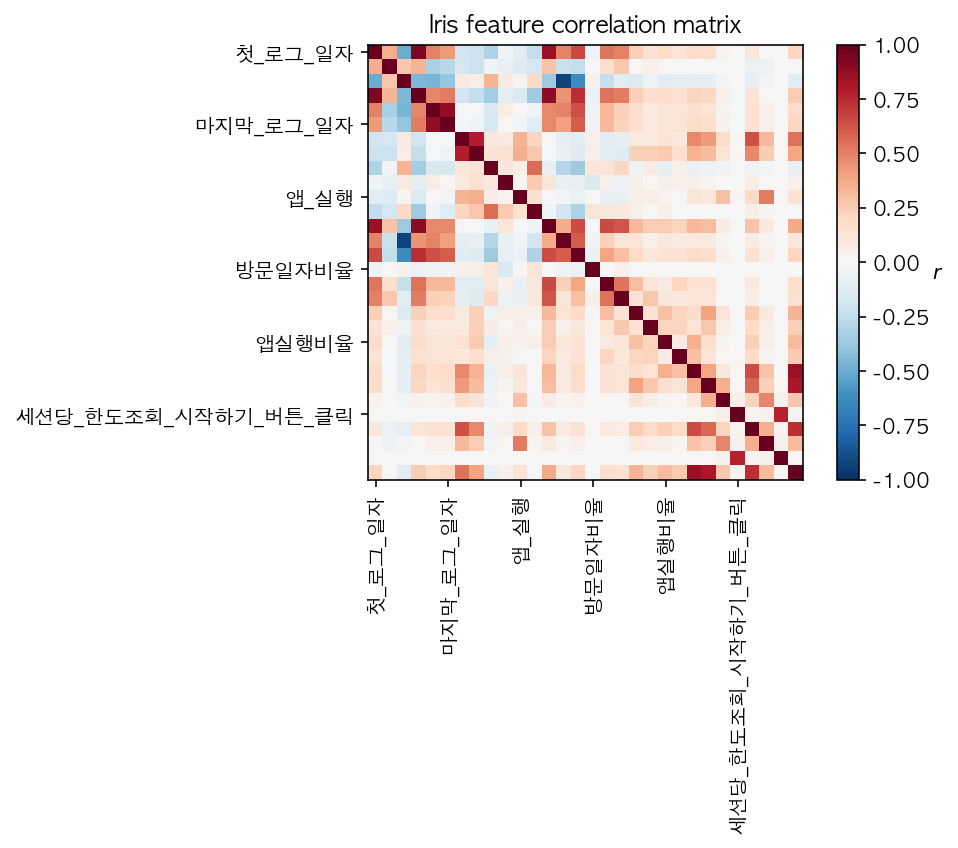

In [101]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)
# ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(X.columns), rotation=90)
# ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(X.columns))


plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")

In [102]:
X.columns, len((X.columns))

(Index(['고유_일자', '첫_로그_일자', '마지막_로그_일자', '앱_실행', '방문일자비율', '앱실행비율',
        '세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회', '세션당_대출관리_서비스_이용',
        '세션당_로그인', '세션당_본인인증완료', '세션당_KCB_신용정보_조회', '전체_이벤트', 'R', 'F',
        '세션당_여윳돈+DSR_계산기_서비스_이용', 'UG', 'GU', 'GV', 'UV', 'VG', 'VU',
        'funnel_01', 'funnel_10', 'funnel_21', 'funnel_32',
        'funnel_10_hesitate_mean', 'funnel_21_hesitate_sec_mean',
        'funnel_32_hesitate_sec_mean', 'funnel_100'],
       dtype='object'),
 30)

In [103]:
corr_df = X.corr(method='pearson')
corr_cols=corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j])>0.8 and i!=j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])

('고유_일자', '전체_이벤트') 0.8590380700988114
('고유_일자', '앱_실행') 0.9340776041472824
('마지막_로그_일자', 'R') -0.9234822161811861
('앱_실행', '전체_이벤트') 0.8912959918438876
('방문일자비율', '앱실행비율') 0.8841868915023686
('funnel_01', 'funnel_100') 0.8599806355605302
('funnel_10', 'funnel_100') 0.8091888579538411


In [104]:
drop_cols=['전체_이벤트', '앱_실행','앱실행비율', 'funnel_01', 'funnel_10', 
           '세션당_본인인증완료', '마지막_로그_일자']
#'M','GUV',,"조회_전환_시간" , 'funnel_32', 'funnel_21'
X_corred=X.drop(drop_cols, axis=1)
len(X_corred.columns)

23

In [105]:
corr_df = X_corred.corr(method='pearson')
corr_cols = corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j]) > 0.7 and i != j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])

('세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회') 0.7826567516219883
('funnel_32', 'funnel_32_hesitate_sec_mean') 0.7748891829954463
('funnel_10_hesitate_mean', 'funnel_100') 0.7362306730403855


Text(0.5, 1.0, 'Iris feature correlation matrix')

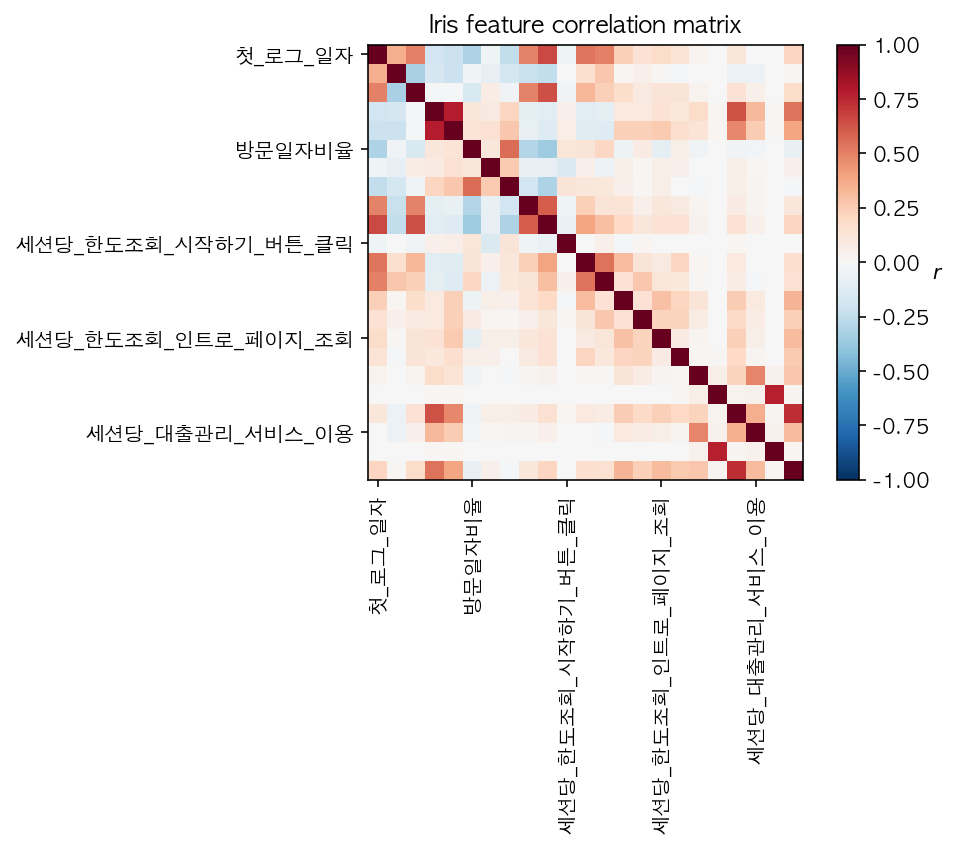

In [73]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X_corred.T), cmap="RdBu_r", vmin=-1, vmax=1)

# ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(X_corred.columns), rotation=90)
# ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(X_corred.columns))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")

### 군집 조건 분할

In [74]:
X_corred.columns

Index(['고유_일자', '첫_로그_일자', '방문일자비율', '세션당_한도조회_시작하기_버튼_클릭',
       '세션당_한도조회_인트로_페이지_조회', '세션당_대출관리_서비스_이용', '세션당_로그인', '세션당_KCB_신용정보_조회',
       'R', 'F', '세션당_여윳돈+DSR_계산기_서비스_이용', 'UG', 'GU', 'GV', 'UV', 'VG', 'VU',
       'funnel_21', 'funnel_32', 'funnel_10_hesitate_mean',
       'funnel_21_hesitate_sec_mean', 'funnel_32_hesitate_sec_mean',
       'funnel_100'],
      dtype='object')

In [75]:
# X_spec = X_corred[['대출희망금액', '기대출수', '기대출금액', '신용점수등급', '연소득분위', '입사개월', '나이',
#                    '유저_성별', '대출_목적_0', '대출_목적_1', '대출_목적_2', '근로형태_0', '근로형태_2', '고용형태_0',
#                    '주거소유형태_0', '주거소유형태_1', '주거소유형태_2']]

X_log = X_corred[['고유_일자', '첫_로그_일자', '방문일자비율',
                  '세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회',
                  '세션당_대출관리_서비스_이용', '세션당_로그인',
                   '세션당_KCB_신용정보_조회', 'R', 'F','세션당_여윳돈+DSR_계산기_서비스_이용']]

X_route = X_corred[['UG', 'GU', 'GV', 'UV', 'VG', 'VU',
       'funnel_10_hesitate_mean', 'funnel_21_hesitate_sec_mean',
       'funnel_32_hesitate_sec_mean', 'funnel_100','funnel_32', 'funnel_21']]
#'UGV','UVG', 'GVU', 'VUG', 'VGU', 

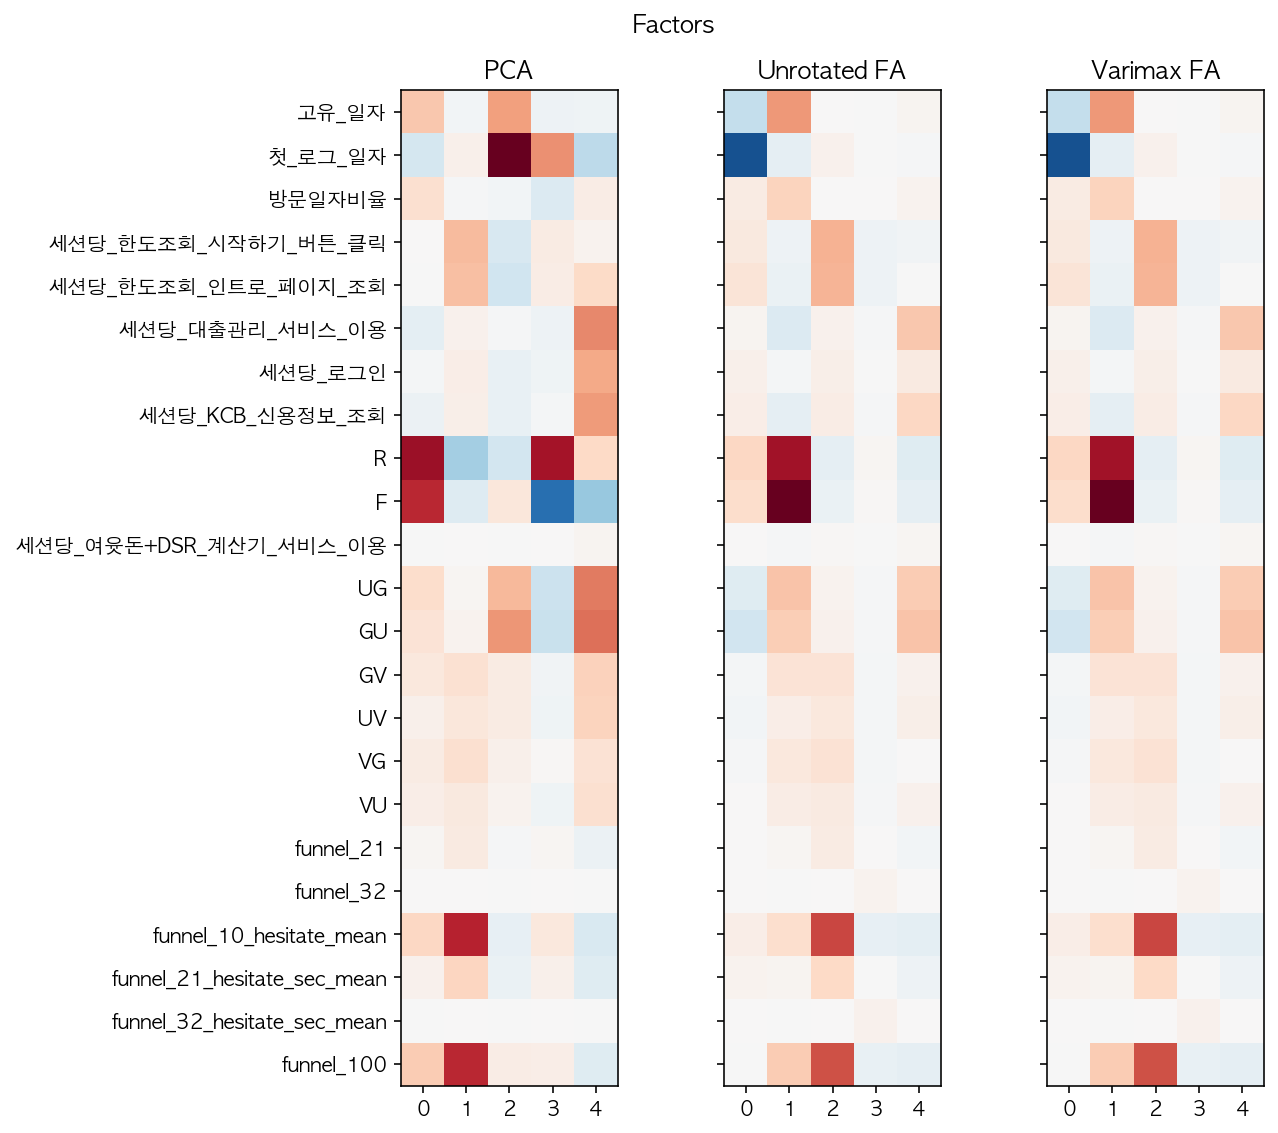

In [76]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

n_comps = 5

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis("varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X_corred)

    components = fa.components_.T
    # print("\n\n %s :\n" % method)
    # print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(X_corred.columns)))
    if ax.is_first_col():
        ax.set_yticklabels(X_corred.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([x for x in range(0, n_comps)])
    # ax.set_xticklabels([x for x in range(1, 15)])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

# PCA, Unrotated FA, Varimax FA

## PCA

In [77]:
from sklearn.decomposition import PCA

max=0
num=0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_corred)
    principalDf = pd.DataFrame(data=printcipalComponents)#, columns=['principal component1', 'principal component2'])
    if sum(pca.explained_variance_ratio_)>max: 
        max=sum(pca.explained_variance_ratio_)
        num=i
        if max>0.75: break
        
print(max, num, len(X_corred))

0.7527801829384811 5 40788


In [21]:
# from sklearn.decomposition import PCA

# max = 0
# num = 0
# for i in range(1, 100):
#     pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
#     printcipalComponents = pca.fit_transform(X_spec)
#     # , columns=['principal component1', 'principal component2'])
#     principalDf = pd.DataFrame(data=printcipalComponents)
#     if sum(pca.explained_variance_ratio_) > max:
#         max = sum(pca.explained_variance_ratio_)
#         num = i
#         if max > 0.75:
#             break

# print(max, num, len(X_spec.columns))

In [78]:
from sklearn.decomposition import PCA

max = 0
num = 0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_log)
    # , columns=['principal component1', 'principal component2'])
    principalDf = pd.DataFrame(data=printcipalComponents)
    if sum(pca.explained_variance_ratio_) > max:
        max = sum(pca.explained_variance_ratio_)
        num = i
        if max > 0.75:
            break

print(max, num, len(X_log.columns))

0.8087260600265047 3 11


In [79]:
from sklearn.decomposition import PCA

max = 0
num = 0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_route)
    # , columns=['principal component1', 'principal component2'])
    principalDf = pd.DataFrame(data=printcipalComponents)
    if sum(pca.explained_variance_ratio_) > max:
        max = sum(pca.explained_variance_ratio_)
        num = i
        if max > 0.75:
            break

print(max, num, len(X_route.columns))

X_cluster=principalDf.copy()

0.8006364768175532 5 12


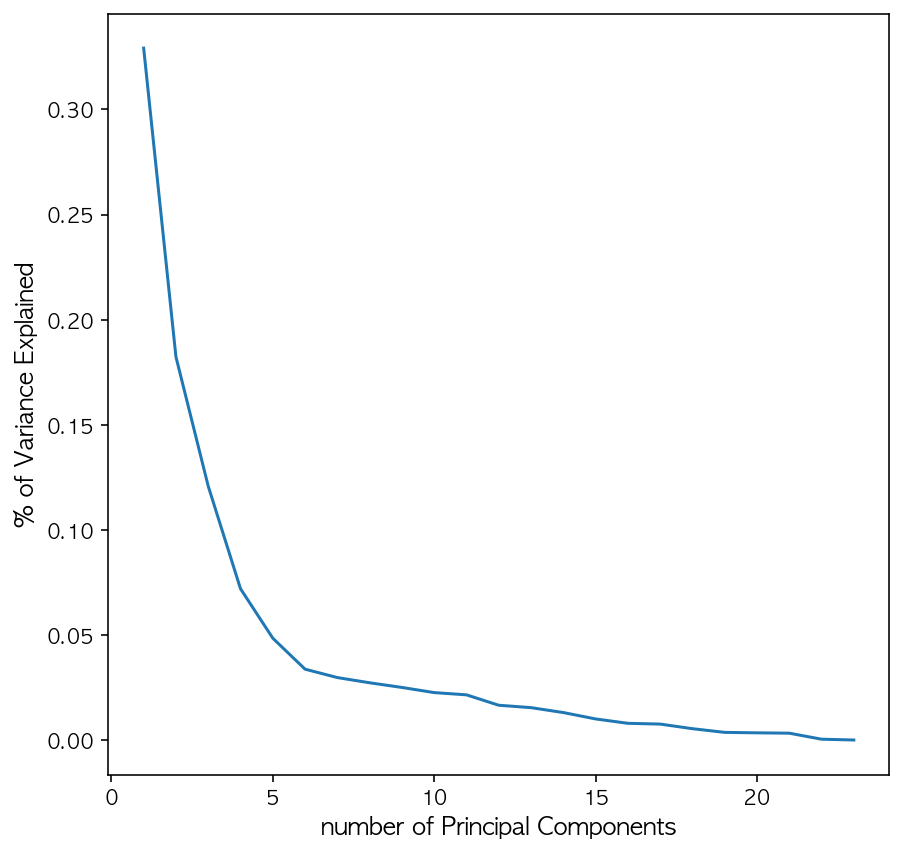

In [80]:
pca = PCA(random_state=0)
pca.fit_transform(X_corred)
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(range(1, X_corred.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel("number of Principal Components", fontsize=12)
plt.ylabel("% of Variance Explained", fontsize=12)
plt.show()

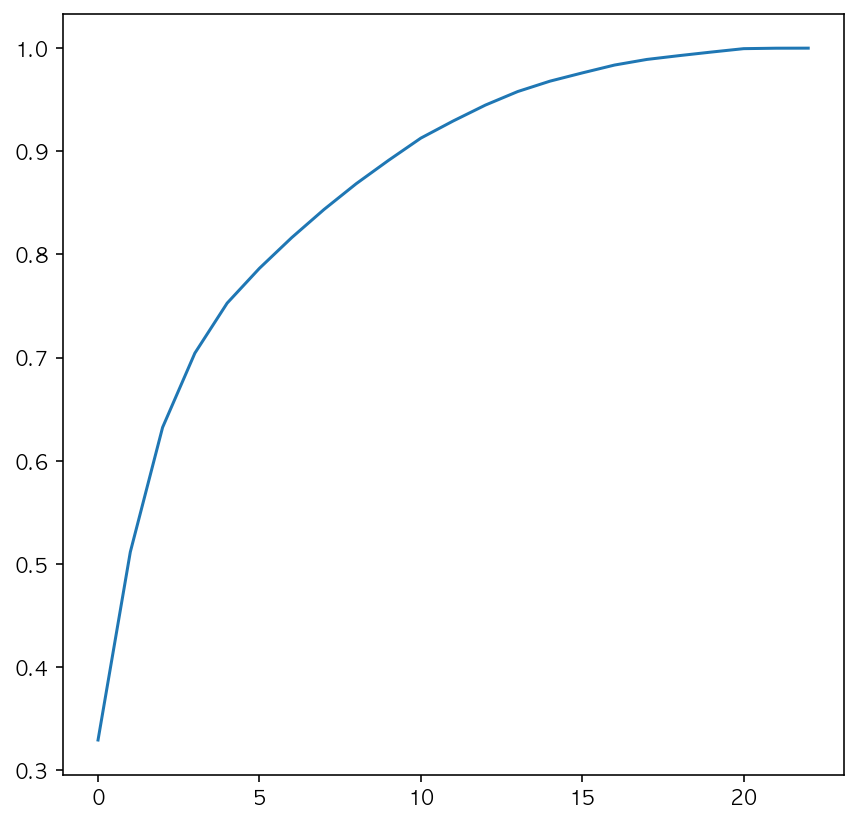

In [81]:
# PCA 주성분분석 차원 갯수 늘어날 때마다의 설명력
pca = PCA(random_state=0)
X_p = pca.fit_transform(X_corred)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

## Varimax

Varimax를 위한 검정

In [26]:
# !pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import FactorAnalyzer

chi_square_value, p_value=calculate_bartlett_sphericity(X_corred)
chi_square_value, p_value

(349349.1933016554, 0.0)

In [27]:
kmo_all, kmo_model=calculate_kmo(X_log) 
kmo_model

0.5891678684180721

In [28]:
# Unrotated FA
fa=FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(X_route)
ev, v=fa.get_eigenvalues()
ev

array([2.73330992, 1.52161096, 1.01369647, 0.96193472, 0.92465365,
       0.90573961, 0.69719162, 0.59552336, 0.3956866 , 0.25065309])

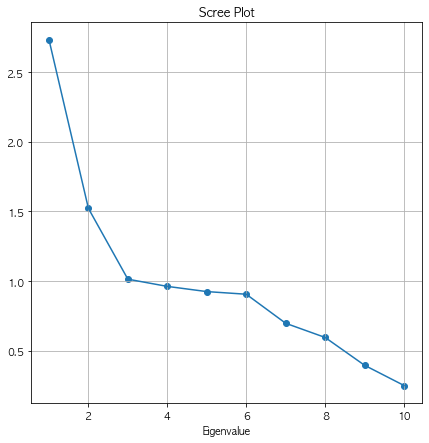

In [29]:
plt.scatter(range(1, X_route.shape[1]+1), ev)
plt.plot(range(1, X_route.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Eigenvalue')
plt.grid()
plt.show() # X_corred 4개, X_log 3개, X_route 2개

In [30]:
# Varimax FA
fa=FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(X_corred)
efa_result=pd.DataFrame(fa.loadings_, index=X_corred.columns)
efa_result

,0,1,2,3,4
고유_일자,0.469004,-0.045492,0.668842,-0.329357,0.234918
첫_로그_일자,-0.554594,-0.075828,0.672708,-0.254721,0.049146
방문일자비율,0.737828,0.027913,0.100413,-0.018339,0.168933
세션당_한도조회_시작하기_버튼_클릭,-0.082303,0.792238,-0.217496,0.186274,0.232829
세션당_한도조회_인트로_페이지_조회,-0.099583,0.546625,-0.325936,0.219610,0.478588
세션당_대출관리_서비스_이용,-0.182884,-0.008076,0.102542,0.785951,-0.027462
세션당_로그인,0.002222,-0.013982,-0.107043,0.194173,0.200007
세션당_KCB_신용정보_조회,-0.076180,0.018630,-0.073602,0.711429,0.163114
R,0.626793,-0.008141,0.081954,-0.239100,0.097123
F,0.825056,0.038550,0.227875,-0.297888,0.116858


<AxesSubplot:>

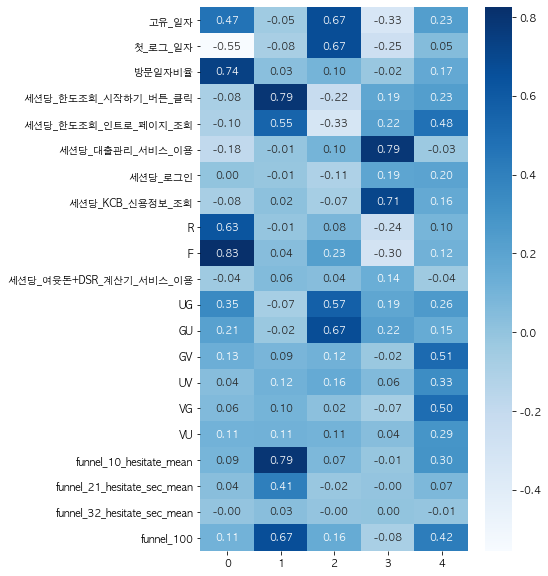

In [31]:
plt.figure(figsize=(6, 10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [32]:
fa=FactorAnalyzer(n_factors=23, rotation="varimax")
fa.fit(X_corred) # 최대우도
fa.get_factor_variance()
df1=pd.DataFrame(fa.get_factor_variance())
df1.index=['SS Loadings', 'Proportion Var', 'Cumulative Var']
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
SS Loadings,2.667775,2.244555,1.335292,1.243295,1.083400,1.071760,0.835926,0.603884,0.556884,0.468831,0.300656,0.148806,0.081184,0.072557,0.072104,0.053141,0.042300,0.034860,0.018356,0.002117,0.00000
Proportion Var,0.127037,0.106884,0.063585,0.059205,0.051590,0.051036,0.039806,0.028756,0.026518,0.022325,0.014317,0.007086,0.003866,0.003455,0.003434,0.002531,0.002014,0.001660,0.000874,0.000101,0.00000
Cumulative Var,0.127037,0.233920,0.297506,0.356710,0.408301,0.459337,0.499143,0.527899,0.554418,0.576743,0.591060,0.598146,0.602012,0.605467,0.608900,0.611431,0.613445,0.615105,0.615979,0.616080,0.61608


In [33]:
FAdf=pd.DataFrame(fa.fit_transform(X_corred))
FAdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.364453,0.911691,-0.261990,-0.764824,-0.012835,-0.524121,0.454923,0.156518,-0.639889,0.159776,-0.054102,-0.817471,-0.052483,0.153602,0.193827,0.396929,-0.232689,-0.179902,0.100981,0.076097,0.0
1,-0.051896,-0.453579,-0.007744,-0.296300,-0.296460,-0.348076,-0.245778,-0.293302,-0.210244,-0.201897,-0.003713,-0.019668,-0.058744,-0.209483,-0.572480,0.292922,-0.077529,0.122775,-0.061365,0.045607,0.0
2,0.312742,-0.419807,-0.316335,-0.848290,-0.437392,-0.336158,-0.415563,-0.056534,-0.403067,-0.255051,-0.003873,-0.187666,-0.078184,0.215295,0.497947,0.310751,0.014001,0.258838,0.032443,0.044878,0.0
3,-0.909260,-0.433306,0.312260,0.812305,0.022964,-0.316470,-0.258455,-0.077219,-0.232207,-0.757330,0.239078,-0.083761,0.005114,0.194859,-0.899458,0.119011,0.067789,0.125334,0.036498,0.012573,0.0
4,-0.869215,-0.450299,-0.373036,0.934060,-0.583393,-0.270247,-0.468511,-0.361043,0.239832,0.317066,-0.378312,0.052288,0.036355,0.218982,-0.868153,-0.472154,0.022028,0.058081,-0.161974,0.110978,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40783,0.896711,-0.523757,-1.004554,1.150754,-0.828272,0.194368,-0.340870,-0.530215,-0.052199,-0.671365,0.158282,0.200231,-0.082787,-0.298715,-0.192453,0.007036,-0.168709,-0.029649,-0.188522,0.084556,0.0
40784,2.381580,-1.001397,0.052564,1.797692,0.065865,0.410652,-0.314828,2.541018,1.364401,0.724234,-0.052379,-0.270574,-0.268210,0.682452,-0.198262,0.379746,-0.865842,0.075465,-0.660191,0.282215,0.0
40785,1.525411,-0.579745,-0.435874,1.152841,0.396562,0.370111,-0.484750,-0.057561,-0.426757,-0.425141,0.020756,-0.049966,-0.069976,-0.113674,0.474876,0.147592,-0.083481,0.095181,-0.007798,-0.015722,0.0
40786,-0.781597,-0.457813,-0.081858,0.368624,0.596792,-0.219921,-0.354517,-0.084377,-0.058377,-0.086911,-0.445459,-0.073280,0.044879,-0.245378,-0.133685,-0.512962,-0.089046,-0.059035,-0.083657,-0.169874,0.0


- 요인 분석이 10개까지 가도 설명력이 0.38이라 소용이 없음
- 23개까지 가도 0.56

In [82]:
pca_list=[5, 3]
for i in range(2):
    pca = PCA(n_components=pca_list[i])  # 주성분을 몇개로 할지 결정
    if i==0:
        printcipalComponents = pca.fit_transform(X_route)
        X_cluster_r = pd.DataFrame(data=printcipalComponents)
    else :
        printcipalComponents = pca.fit_transform(X_log)
        X_cluster_l = pd.DataFrame(data=printcipalComponents)


# X_cluster_r=principalDf.copy() # 7
# X_cluster_l=principalDf.copy() # 8
# X_cluster_s=principalDf.copy() # 10
# X_cluster_2=FAdf.copy()

## 군집화

In [83]:
import matplotlib as mpl

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rc('axes', unicode_minus=False)  # 유니코드에서 음수 부호 설정
warnings.filterwarnings("ignore")

In [84]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette_kmeans(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster)+'\n'
                           'Silhouette Score :' + str(round(sil_avg, 3)))
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

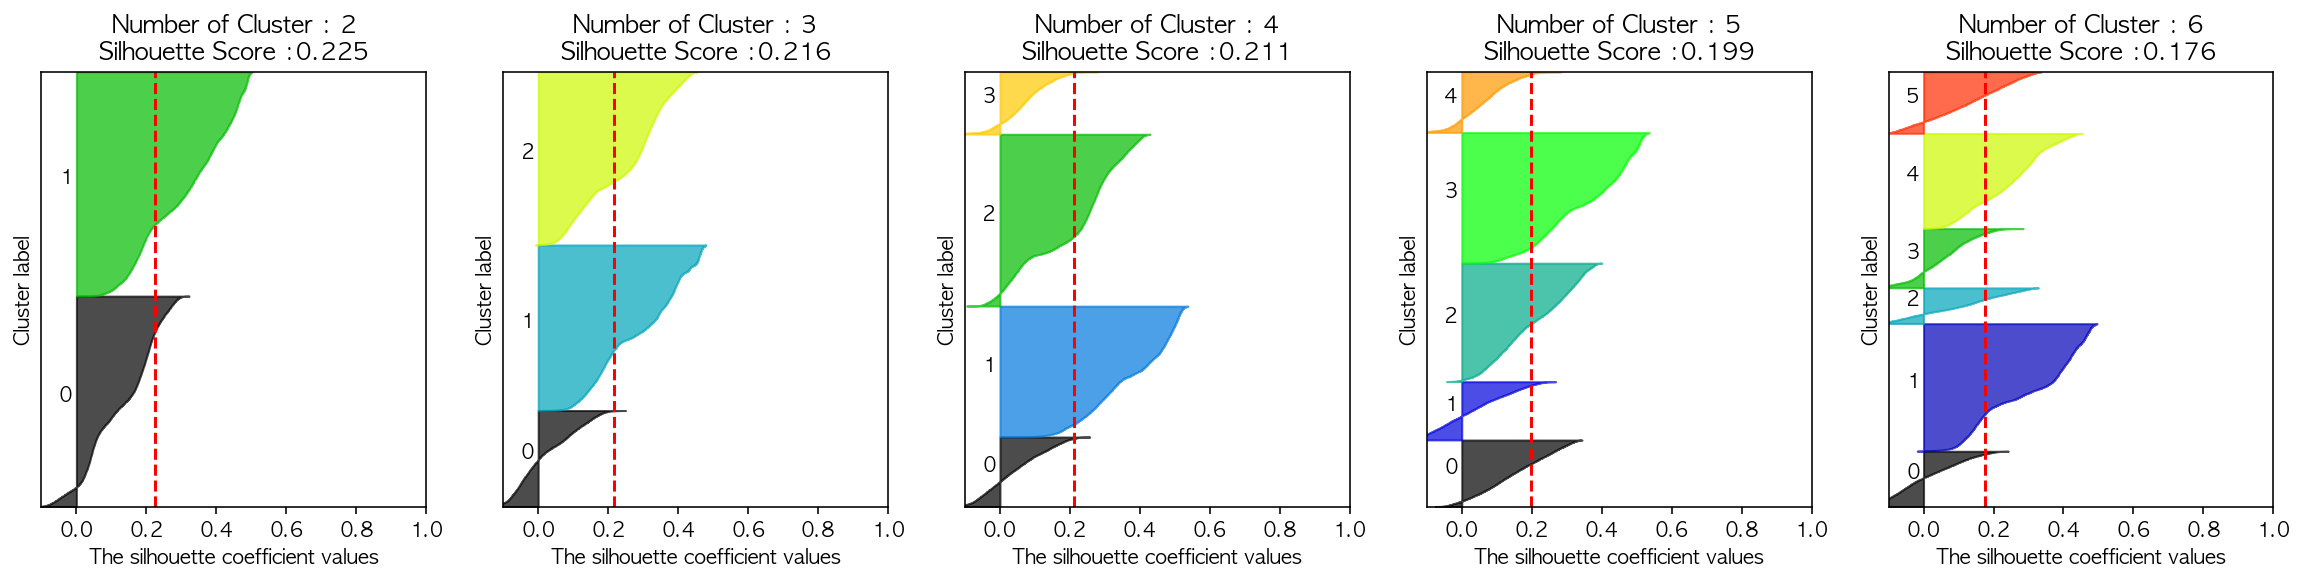

In [109]:
visualize_silhouette_kmeans([2, 3, 4, 5, 6], X_corred) # 88분

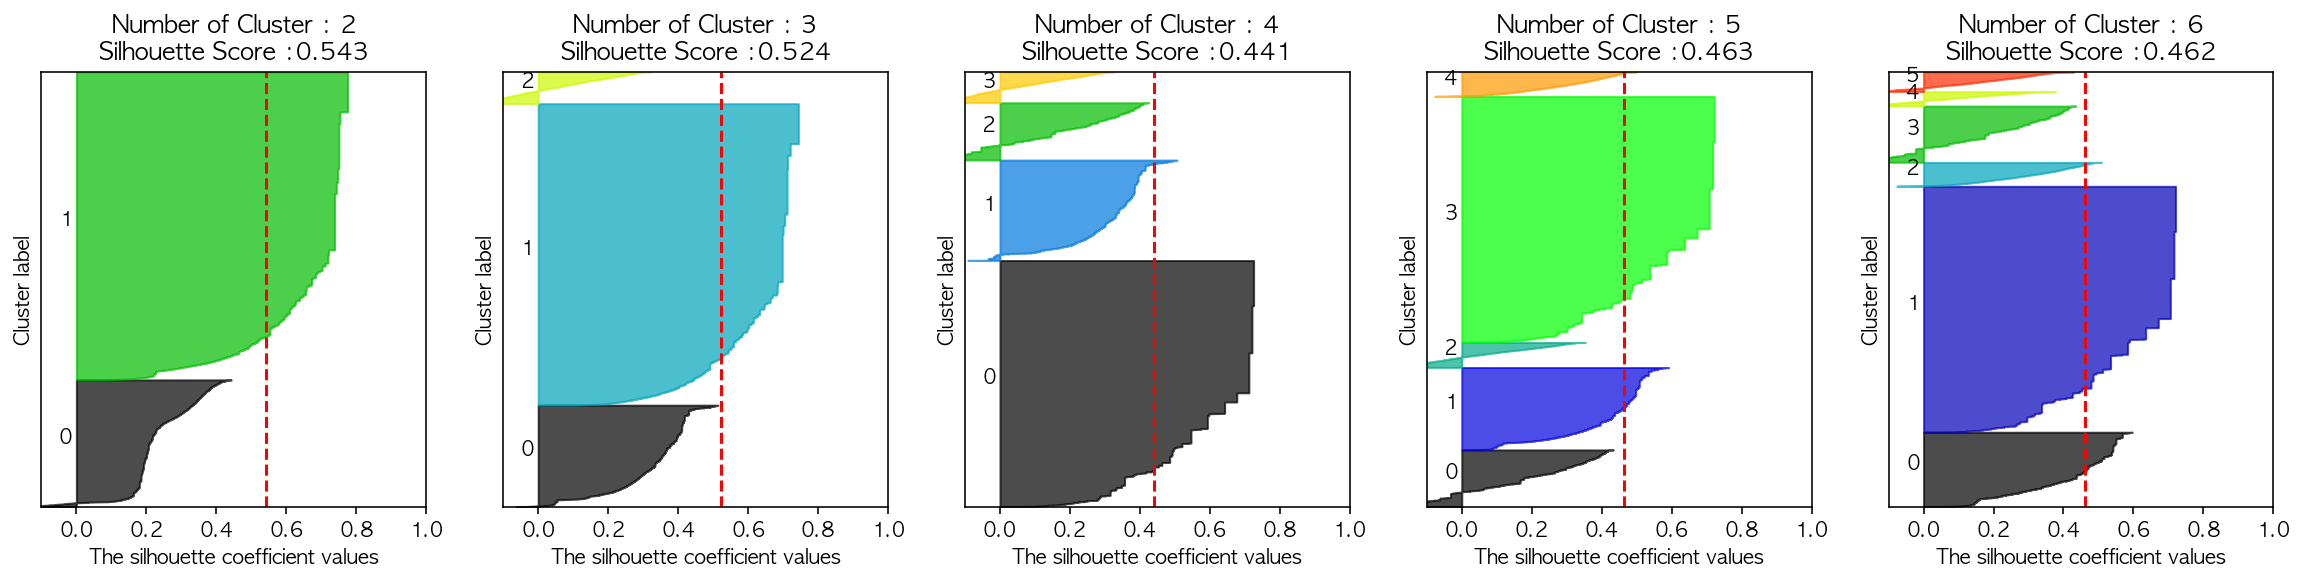

In [85]:
visualize_silhouette_kmeans([2, 3, 4, 5, 6], X_cluster_r) 

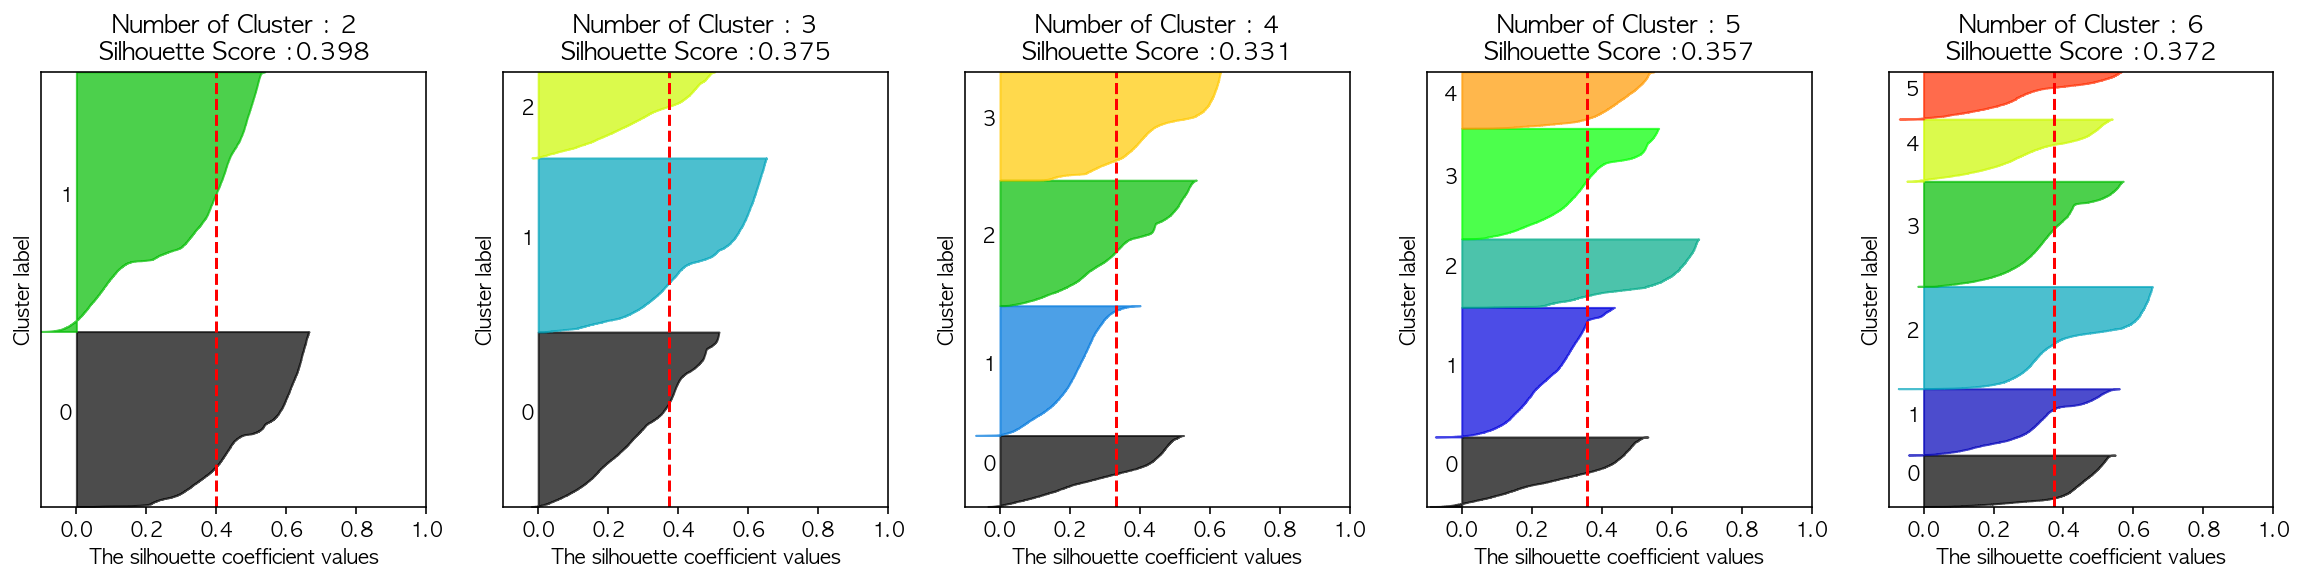

In [86]:
visualize_silhouette_kmeans([2, 3, 4, 5, 6], X_cluster_l) 

In [90]:
df_na.to_csv("../data/df_na_2.csv", index=False)

In [88]:
X_cluster_l.to_csv("../data/no_spec_cluster_l_2.csv", index=False)
X_cluster_r.to_csv("../data/no_spec_cluster_r_2.csv", index=False)
# X_cluster_s.to_csv("../data/no_spec_cluster_s.csv", index=False)

In [89]:
X_log.to_csv("../data/no_spec_log_2.csv", index=False)
X_route.to_csv("../data/no_spec_route_2.csv", index=False)
X_corred.to_csv("../data/no_spec_corred_2.csv", index=False)